In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset
swiggy_df = pd.read_csv('D:\\CubeAI Internship\\Task-9 Swiggy Data Analysis\\swiggy.csv')


In [3]:

# Display a concise summary of the DataFrame
print(swiggy_df.info())

swiggy1_df = swiggy_df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   int64  
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 678.3+ KB
None


In [4]:
# Check for null values
print(swiggy1_df.isnull().sum())

# Drop rows with any null values
swiggy1_df = swiggy1_df.dropna()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64


In [20]:
swiggy1_df.describe(include="all")

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time,Normalized Restaurant
count,8680.000000,8680,8680,8680,8680.000000,8680.000000,8680.000000,8680,8680,8680.000000,8680
unique,NaN,833,9,7865,NaN,NaN,NaN,3734,2339,NaN,7819
top,NaN,Rohini,Kolkata,La Pino'Z Pizza,NaN,NaN,NaN,Indian,Rohini,NaN,la pinoz pizza
freq,NaN,257,1346,13,NaN,NaN,NaN,389,229,NaN,15
mean,244812.071429,NaN,NaN,NaN,348.444470,3.655104,156.634793,NaN,NaN,53.967051,NaN
std,158671.617188,NaN,NaN,NaN,230.940074,0.647629,391.448014,NaN,NaN,14.292335,NaN
min,211.000000,NaN,NaN,NaN,0.000000,2.000000,20.000000,NaN,NaN,20.000000,NaN
25%,72664.000000,NaN,NaN,NaN,200.000000,2.900000,50.000000,NaN,NaN,44.000000,NaN
50%,283442.000000,NaN,NaN,NaN,300.000000,3.900000,80.000000,NaN,NaN,53.000000,NaN
75%,393425.250000,NaN,NaN,NaN,400.000000,4.200000,100.000000,NaN,NaN,64.000000,NaN


In [5]:
# Convert 'Avg ratings' to float, 'Total ratings' and 'Price' to int
swiggy1_df['Avg ratings'] = swiggy1_df['Avg ratings'].astype(float)
swiggy1_df['Total ratings'] = swiggy1_df['Total ratings'].astype(int)
swiggy1_df['Price'] = swiggy1_df['Price'].astype(int)

Top 5 areas with the highest number of restaurants:
 Area
Rohini          257
Chembur         208
Kothrud         149
Andheri East    135
Navrangpura     132
Name: count, dtype: int64


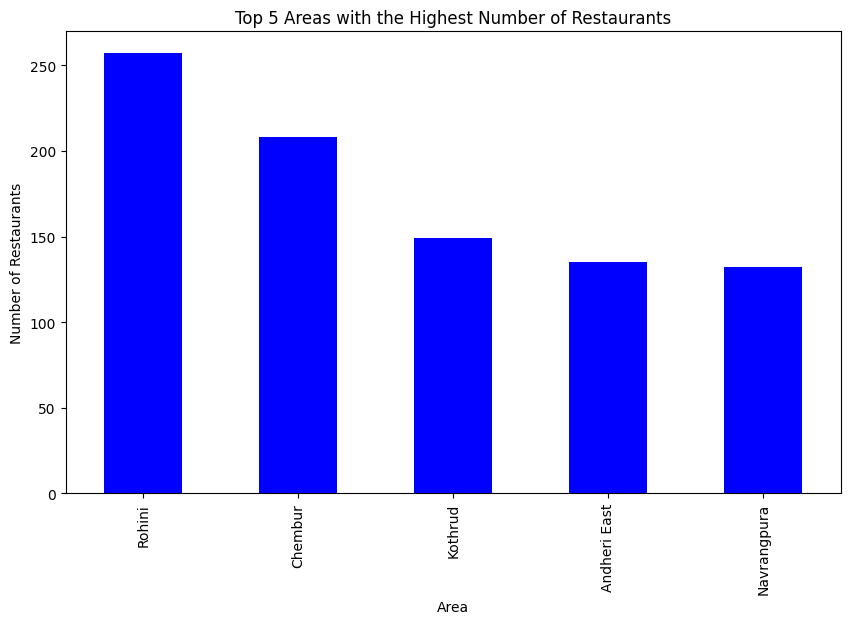

In [6]:
# Top 5 Areas with the Highest Number of Restaurants
area_counts = swiggy1_df['Area'].value_counts().head(5)
print("Top 5 areas with the highest number of restaurants:\n", area_counts)

plt.figure(figsize=(10,6))
area_counts.plot(kind='bar', color='blue')
plt.title('Top 5 Areas with the Highest Number of Restaurants')
plt.xlabel('Area')
plt.ylabel('Number of Restaurants')
plt.show()


Distribution of restaurants across different cities:
 City
Kolkata      1346
Mumbai       1277
Chennai      1106
Pune         1090
Hyderabad    1075
Bangalore     946
Ahmedabad     717
Delhi         611
Surat         512
Name: count, dtype: int64


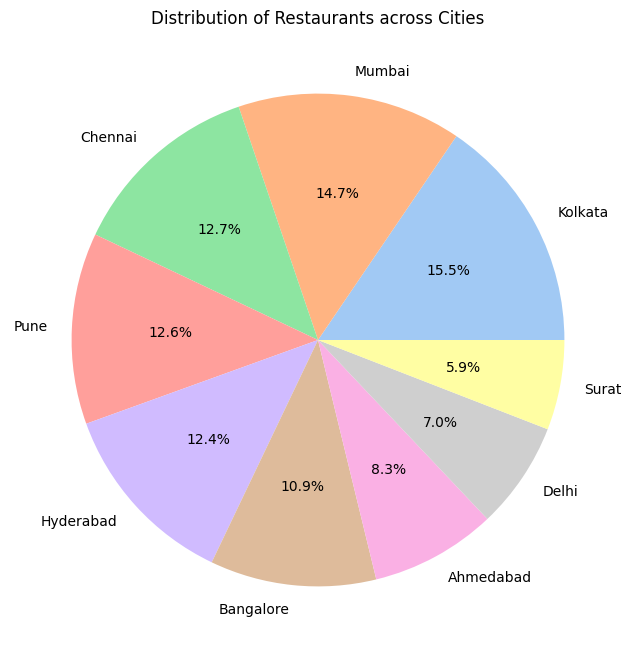

In [7]:

# c. Distribution of Restaurants across Different Cities
city_counts = swiggy1_df['City'].value_counts()
print("Distribution of restaurants across different cities:\n", city_counts)

plt.figure(figsize=(8,8))
city_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Restaurants across Cities')
plt.ylabel('')
plt.show()


In [8]:
# d. Average Rating of Restaurants
average_rating = swiggy1_df['Avg ratings'].mean()
print("Average Rating of Restaurants:", average_rating)


Average Rating of Restaurants: 3.655103686635944


Most popular food type: Chinese


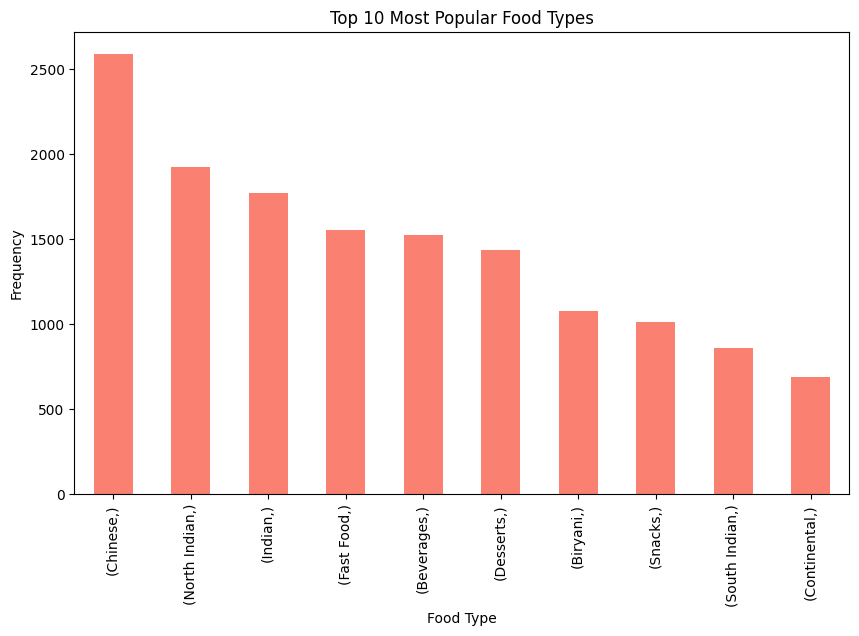

In [9]:
# Most Popular Food Types
a = []
for i in swiggy1_df['Food type'].values:
    try:
        for j in i.split(','):
            a.append(j.strip())  # Strip whitespace from each food type
    except:
        a.append(i) 

popular_food_df = pd.DataFrame({"all_food_types": a}).value_counts().head(10)
print("Most popular food type:", popular_food_df.index[0][0])

plt.figure(figsize=(10,6))
popular_food_df.plot(kind='bar', color='salmon')
plt.title('Top 10 Most Popular Food Types')
plt.xlabel('Food Type')
plt.ylabel('Frequency')
plt.show()

In [10]:
# g. Average Delivery Time across Different Areas
average_delivery_time_by_area = swiggy1_df.groupby('Area')['Delivery time'].mean()
print("Average delivery time by area:\n", average_delivery_time_by_area)


Average delivery time by area:
 Area
 Akhbar Nagar Circle               53.000000
 Begumpet                          67.000000
26                                 58.000000
3Rd Block Jayanagar                42.000000
A Unit Of M/S Cohort  Ruby Area    67.000000
                                     ...    
Yamuna Nagar                       39.333333
Yerawada                           61.571429
Yoginagar Society                  55.000000
Yousufguda                         68.000000
Zamistanpur                        39.000000
Name: Delivery time, Length: 833, dtype: float64


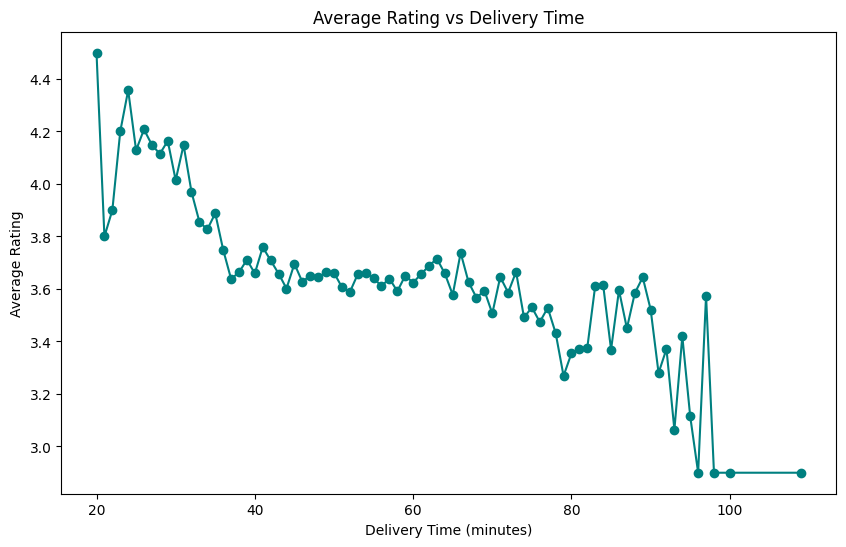

In [11]:
# Average Rating vs Delivery Time
average_rating_by_delivery_time = swiggy1_df.groupby('Delivery time')['Avg ratings'].mean()

plt.figure(figsize=(10,6))
average_rating_by_delivery_time.plot(kind='line', marker='o', color='teal')
plt.title('Average Rating vs Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Average Rating')
plt.show()

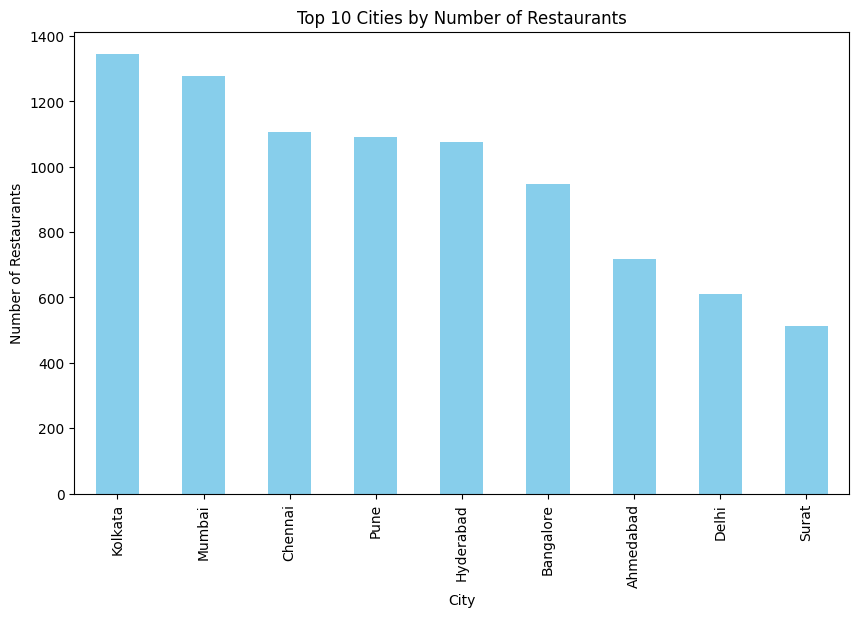

In [12]:

# Top 10 Cities as per Number of Restaurants Listed
top_cities = swiggy1_df['City'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()

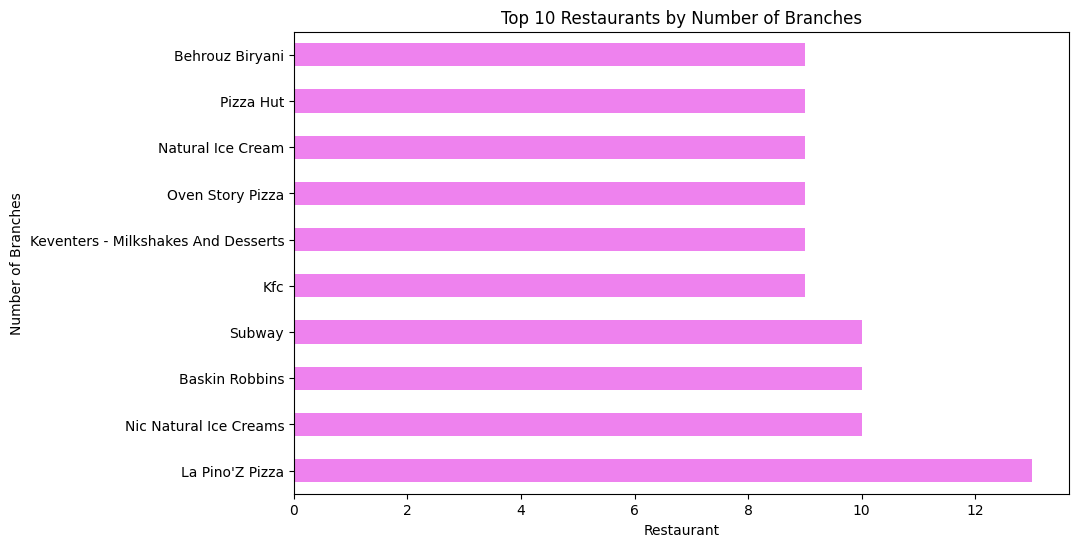

In [18]:
# Restaurants with Maximum Number of Branches
restaurant_branches = swiggy1_df['Restaurant'].value_counts().head(10)

plt.figure(figsize=(10,6))
restaurant_branches.plot(kind='barh', color='violet')
plt.title('Top 10 Restaurants by Number of Branches')
plt.xlabel('Restaurant')
plt.ylabel('Number of Branches')
plt.show()

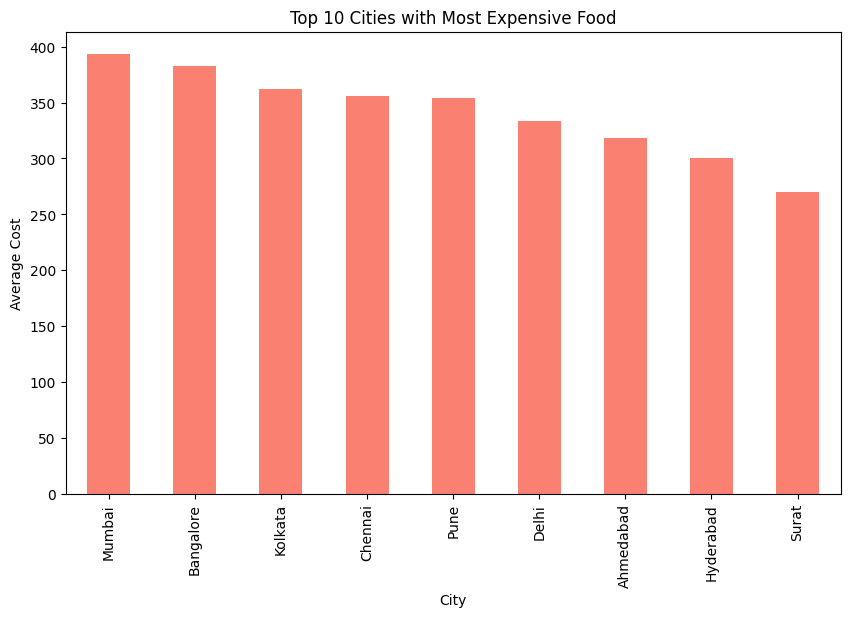

In [14]:
# Cities with Most Expensive Food
average_cost_per_city = swiggy1_df.groupby('City')['Price'].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(10,6))
average_cost_per_city.plot(kind='bar', color='salmon')
plt.title('Top 10 Cities with Most Expensive Food')
plt.xlabel('City')
plt.ylabel('Average Cost')
plt.show()

Top 5 most popular restaurant chains in terms of ratings:
 Normalized Restaurant
pabrai freh & naturelle ice cream    4.8
poetry by love & cheeecake           4.7
momo a-khang by kailah kitchen       4.7
nurat                                4.7
havmor                               4.7
Name: Avg ratings, dtype: float64


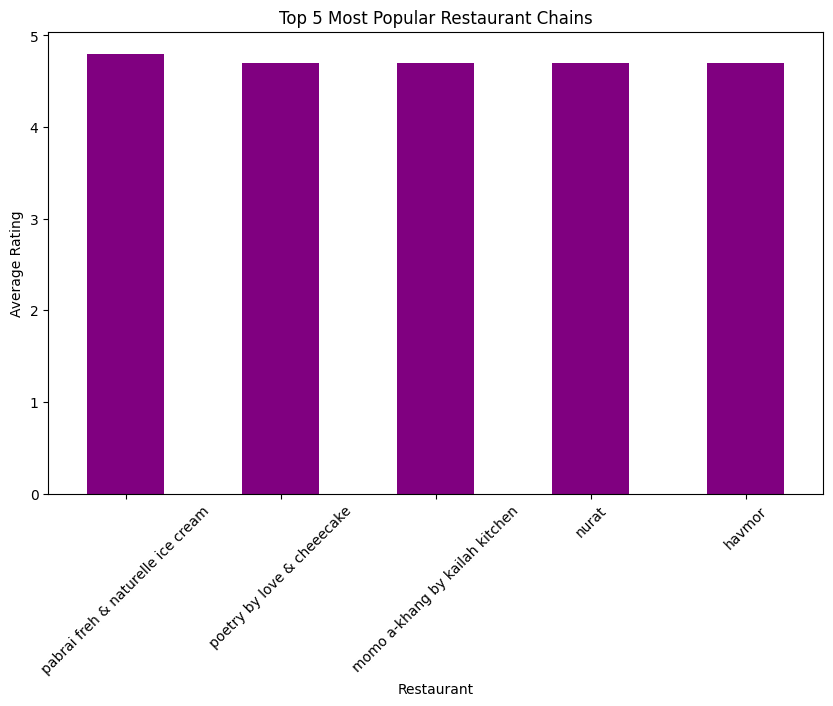

In [15]:
# Function to normalize restaurant names
def normalize_restaurant_name(name):
    return name.lower().replace("'", "").replace(" and ", " & ").replace("s", "").strip()

# Add a column for normalized restaurant names
swiggy1_df['Normalized Restaurant'] = swiggy1_df['Restaurant'].apply(normalize_restaurant_name)

# Filter restaurants with at least 100 total ratings
rating_count_100_df = swiggy1_df[swiggy1_df['Total ratings'] >= 100]

# Group by normalized restaurant name and calculate the mean of average ratings
top_5_popular_chains_df = rating_count_100_df.groupby('Normalized Restaurant')['Avg ratings'].mean().sort_values(ascending=False).head(5)

# Print the result
print("Top 5 most popular restaurant chains in terms of ratings:\n", top_5_popular_chains_df)

# Plot the top 5 popular restaurant chains
plt.figure(figsize=(10,6))
top_5_popular_chains_df.plot(kind='bar', color='purple')
plt.title('Top 5 Most Popular Restaurant Chains')
plt.xlabel('Restaurant')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

Most popular cuisines:
 all_food_types
Chinese           2588
North Indian      1921
Indian            1772
Fast Food         1550
Beverages         1524
Desserts          1436
Biryani           1079
Snacks            1013
South Indian       857
Continental        686
Name: count, dtype: int64


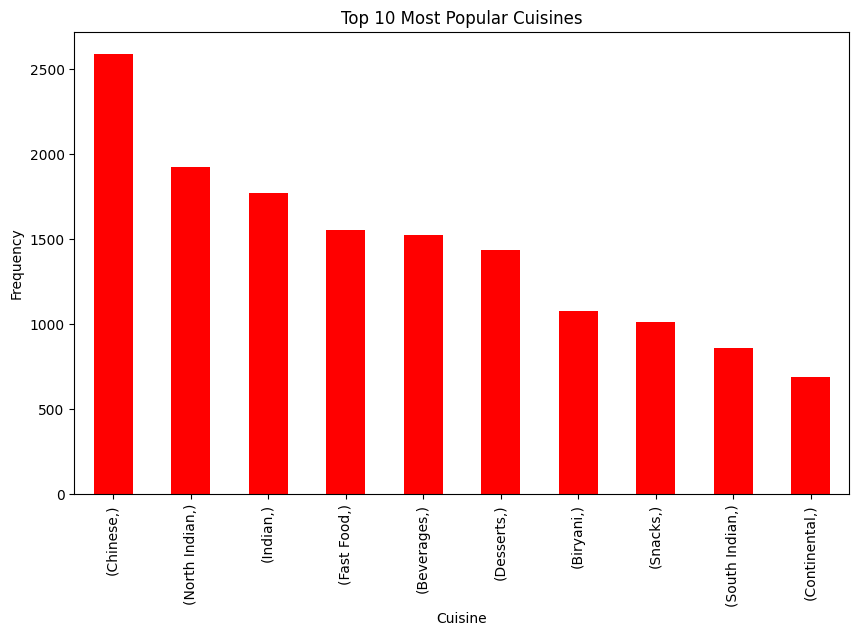

In [16]:
# e. Most Popular Cuisines Served
most_popular_cuisines = pd.DataFrame({"all_food_types": a}).value_counts().head(10)
print("Most popular cuisines:\n", most_popular_cuisines)

plt.figure(figsize=(10,6))
most_popular_cuisines.plot(kind='bar', color='red')
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Frequency')
plt.show()


In [17]:
# Save the modified DataFrame as a CSV file
swiggy1_df.to_csv('modified_swiggy_data.csv', index=False)
